<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/TextMiningAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import re
import nltk
import spacy
nltk.download('stopwords')
nltk.download('punkt')

from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopword
from heapq import nlargest

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

file_path = '/content/drive/MyDrive/Retail_Business/Copy of Text Mining Context file-1.txt'
data = read_file(file_path)

Removing links and users


In [ ]:
def remove_links(text):
    '''Takes a string and removes web links from it'''
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'bit.ly/\S+', '', text)
    text = text.strip('[link]')
    return text

In [ ]:
def remove_users(text):
    '''Takes a string and removes retweet and @user information'''
    text = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)
    text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)
    return text

Text Preprocessing and Stop word removal

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
from heapq import nlargest

STOPWORDS = set(stopwords.words('english') + list(punctuation))
MIN_WORD_PROP, MAX_WORD_PROP = 0.1, 0.9

In [ ]:
def clean_text(text, bigrams=False):
    text = remove_users(text)
    text = remove_links(text)
    text = text.lower()
    text = re.sub('\s+', ' ', text)
    text = re.sub('([0-9]+)', '', text)
    text_token_list = [word for word in text.split(' ')
                            if word not in STOPWORDS]


    return text

In [ ]:
text=clean_text(data)

In [ ]:
text


'optical character recognition (ocr):given an image representing printed text, determine the corresponding text. speech recognition:given a sound clip of a person or people speaking, determine the textual representation of the speech. this is the opposite of text to speech and is one of the extremely difficult problems colloquially termed "ai-complete" (see above). in natural speech there are hardly any pauses between successive words, and thus speech segmentation is a necessary subtask of speech recognition (see below). in most spoken languages, the sounds representing successive letters blend into each other in a process termed coarticulation, so the conversion of the analog signal to discrete characters can be a very difficult process. also, given that words in the same language are spoken by people with different accents, the speech recognition software must be able to recognize the wide variety of input as being identical to each other in terms of its textual equivalent. speech se

Computing Word Frequencies and Sentence Scoring

Computes word frequencies after removing common/rare words and scores sentences based on these frequencies.

In [ ]:
def compute_word_frequencies(word_sentences):
    words = [word for sentence in word_sentences
                     for word in sentence
                         if word not in STOPWORDS]
    counter = Counter(words)
    limit = float(max(counter.values()))
    word_frequencies = {word: freq/limit
                                for word,freq in counter.items()}
    word_frequencies = {word: freq
                            for word,freq in word_frequencies.items()
                                if freq > MIN_WORD_PROP
                                and freq < MAX_WORD_PROP}
    return word_frequencies

In [ ]:
def sentence_score(word_sentence, word_frequencies):
    return sum([ word_frequencies.get(word,0)
                    for word in word_sentence])


 Text Summarization

Summarizes the input text by selecting most relevant sentences based on word frequencies.

In [ ]:
def summarize(text:str, num_sentences=3):

    text = text.lower()

    sentences = sent_tokenize(text)

    # Break sentences into words
    word_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Compute the word frequencies
    word_frequencies = compute_word_frequencies(word_sentences)

    # Calculate the scores for each of the sentences
    scores = [sentence_score(word_sentence, word_frequencies) for word_sentence in word_sentences]
    sentence_scores = list(zip(sentences, scores))

    # Rank the sentences
    top_sentence_scores = nlargest(num_sentences, sentence_scores, key=lambda t: t[1])

    # Return the top sentences
    return [t[0] for t in top_sentence_scores]

In [ ]:
len(sent_tokenize(text))

182

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
from heapq import nlargest

STOPWORDS = set(stopwords.words('english') + list(punctuation))
MIN_WORD_PROP, MAX_WORD_PROP = 0.1, 0.9

Summarized text.

In [ ]:
summarize(text, num_sentences=3)

['tokenization is usually of  types unigram, bigram and trigram a unigram is a single word sequence of words a bigram is a two word sequence of words a trigram is a three word sequence of words parts of speech tagging is a process of tagging words within sentences into their respective parts of speech and then labelling them.',
 'stemming:the process of reducing inflected (or sometimes derived) words to a base form (e.g., "close" will be the root for "closed", "closing", "close", "closer" etc.).',
 'for example, "book" can be a noun ("the book on the table") or verb ("to book a flight"); "set" can be a noun, verb or adjective; and "out" can be any of at least five different parts of speech.']

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
print(sentences)

['optical character recognition (ocr):given an image representing printed text, determine the corresponding text.', 'speech recognition:given a sound clip of a person or people speaking, determine the textual representation of the speech.', 'this is the opposite of text to speech and is one of the extremely difficult problems colloquially termed "ai-complete" (see above).', 'in natural speech there are hardly any pauses between successive words, and thus speech segmentation is a necessary subtask of speech recognition (see below).', 'in most spoken languages, the sounds representing successive letters blend into each other in a process termed coarticulation, so the conversion of the analog signal to discrete characters can be a very difficult process.', 'also, given that words in the same language are spoken by people with different accents, the speech recognition software must be able to recognize the wide variety of input as being identical to each other in terms of its textual equiv

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic Modeling Using LDA

Using TF-IDF vectorization and Latent Dirichlet Allocation (LDA) to extract topics from text. LDA is a generative statistical model that identifies topics within a collection of documents.

In [ ]:
# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

In [ ]:
# Create TfidfVectorizer with the list of stopwords
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(sentences)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [ ]:
# Create CountVectorizer with the list of stopwords
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(sentences)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

def display_topics(model, features, no_top_words=5):
    for topic, word_vector in enumerate(model.components_):
        total = word_vector.sum()
        largest = word_vector.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]],
                  word_vector[largest[i]] * 100.0 / total))

display_topics(lda_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
  words (7.29)
  task (6.93)
  entity (6.93)
  named (6.08)
  names (6.08)

Topic 01
  language (27.72)
  natural (18.07)
  text (6.54)
  computer (6.43)
  processing (5.95)

Topic 02
  text (13.56)
  words (11.93)
  segmentation (6.66)
  data (5.98)
  mining (5.98)

Topic 03
  form (11.52)
  dictionary (9.06)
  machine (7.58)
  known (7.44)
  possible (6.09)

Topic 04
  word (18.41)
  tokenizer (11.05)
  words (9.03)
  regular (8.86)
  expression (7.77)

Topic 05
  speech (17.02)
  grammar (10.89)
  sentence (9.35)
  recognition (9.32)
  textual (7.50)

Topic 06
  sentence (18.38)
  speech (11.48)
  text (10.36)
  given (10.19)
  semantic (9.77)

Topic 07
  words (18.47)
  stemming (11.74)
  documents (8.45)
  similarity (7.26)
  text (6.83)

Topic 08
  analysis (14.92)
  discourse (8.83)
  parsing (8.80)
  semantic (6.95)
  generation (6.21)

Topic 09
  semantics (9.45)
  meaning (7.95)
  context (7.91)
  language (7.67)
  data (6.39)


 Topic Visualization with Word Cloud

Generates and displays word clouds for each identified topic using the most common words in that topic.

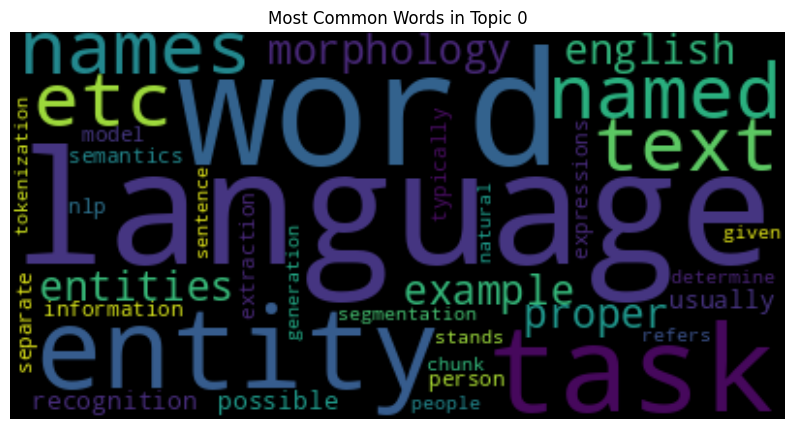

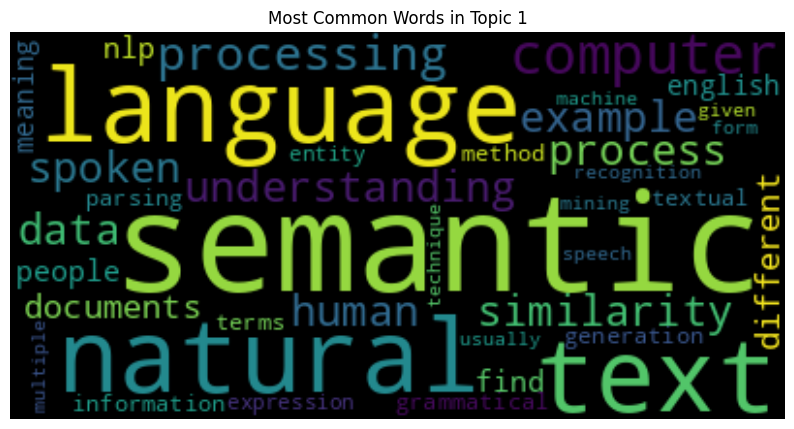

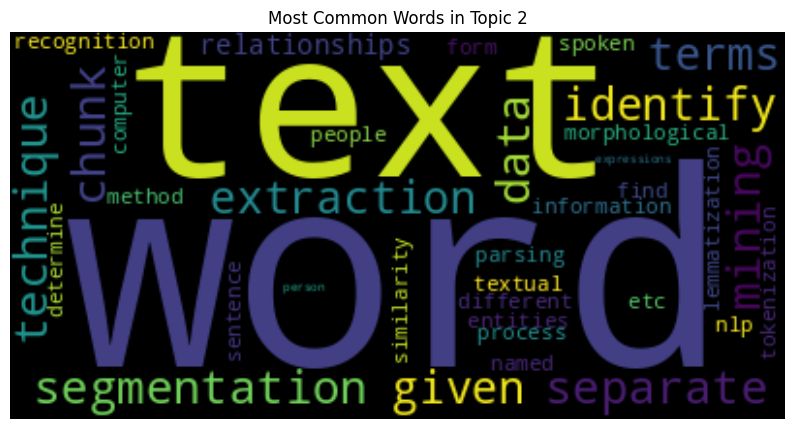

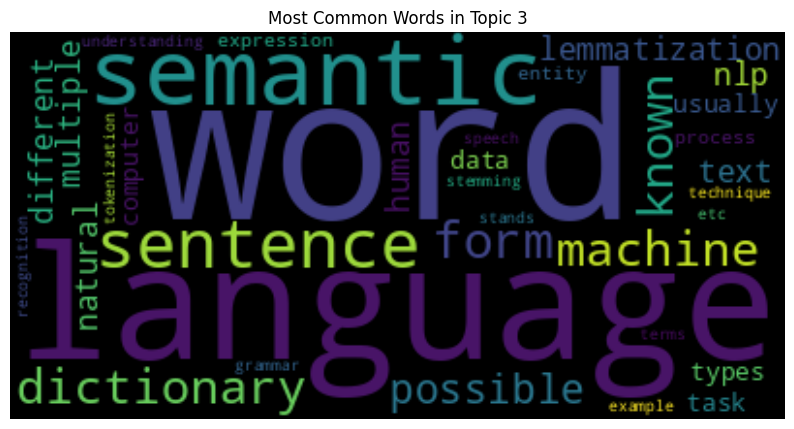

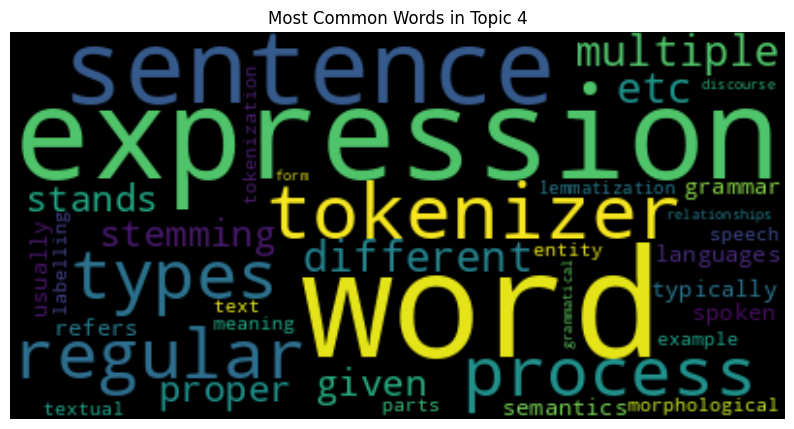

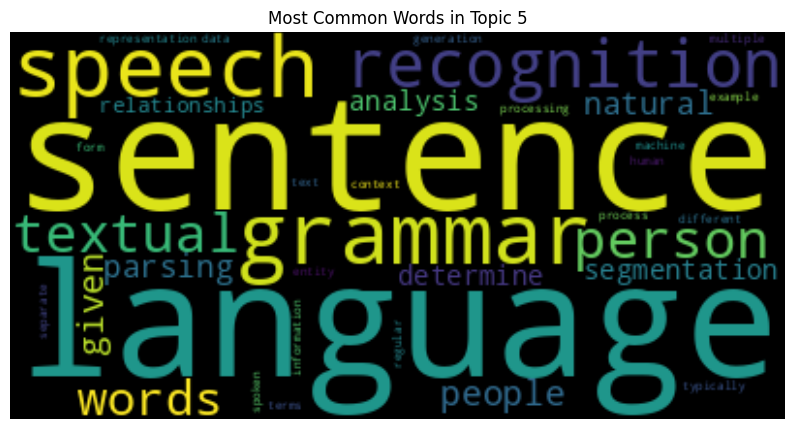

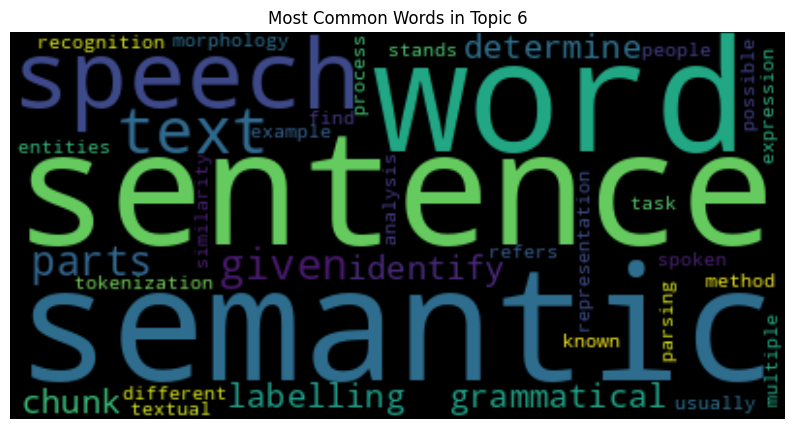

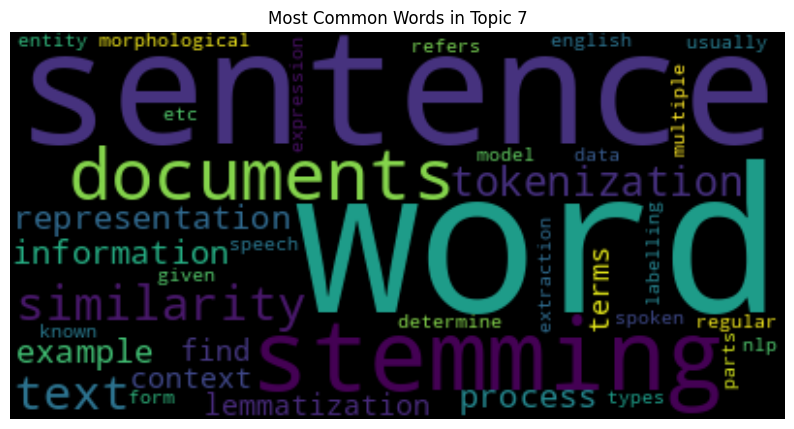

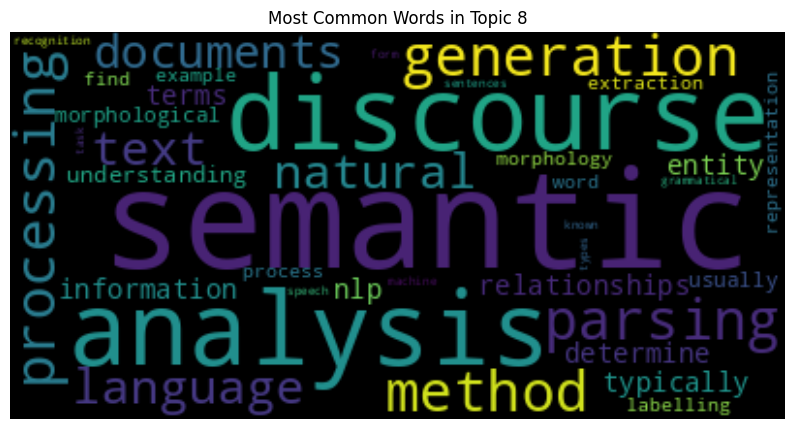

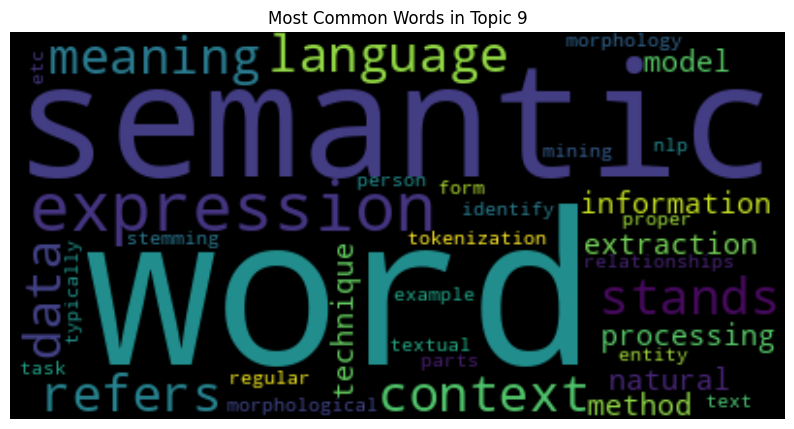

In [ ]:
topic_word = H_lda_para_matrix
tfidf_features = tfidf_para_vectorizer.get_feature_names_out()

def wordcloud(i):
    words_dist = topic_word[i, :]
    ranked_word_indices = words_dist.argsort()
    ranked_words = [tfidf_features[i] for i in ranked_word_indices][-1:-40:-1]
    ranked_words_in_one_text = " ".join(ranked_words)

    # Generate the word cloud
    cloud = WordCloud(background_color='black',
                      colormap="viridis",
                      stopwords=STOPWORDS.add("australia")).generate(ranked_words_in_one_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(f"Most Common Words in Topic {i}")
    plt.axis("off")

# Generate word clouds for all topics
number_of_topics = topic_word.shape[0]
for i in range(number_of_topics):
    wordcloud(i)

plt.show()


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(text[:1000])
displacy.render(doc, style='ent', jupyter=True)


/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Dependency Parsing Visualization

In [ ]:
displacy.render(doc, style='dep')